In [1]:
%matplotlib inline
from gettext import install
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()


# reflect the tables

Base = automap_base()
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

Measurement = Base.classes.measurement

Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB

Session = Session(engine)

In [9]:



inspector=inspect(engine)

In [10]:


Station_data = engine.execute('SELECT * FROM Station')

In [11]:
print(Station_data.keys())

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [12]:
Station_data.fetchall()

[(0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 0.914),
 (1, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 4.45),
 (2, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 2.133),
 (3, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 3.627),
 (4, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 93.447),
 (5, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 5.943),
 (6, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84889, 10.027),
 (7, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.274),
 (8, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 46.449)]

In [13]:
columns=inspector.get_columns('Station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:

measurements=engine.execute('SELECT * FROM Measurement LIMIT 10')

In [15]:
print(measurements.keys())

['id', 'station', 'date', 'prcp', 'tobs']


In [16]:
measurements.fetchall()

[(0, 'USC00519397', '2010-01-01', 2.0, 18.3),
 (1, 'USC00519397', '2010-01-02', 0.0, 17.2),
 (2, 'USC00519397', '2010-01-03', 0.0, 23.3),
 (3, 'USC00519397', '2010-01-04', 0.0, 24.4),
 (4, 'USC00519397', '2010-01-06', None, 22.8),
 (5, 'USC00519397', '2010-01-07', 1.5, 21.1),
 (6, 'USC00519397', '2010-01-08', 0.0, 17.8),
 (7, 'USC00519397', '2010-01-09', 0.0, 20.0),
 (8, 'USC00519397', '2010-01-10', 0.0, 22.8),
 (9, 'USC00519397', '2010-01-11', 0.3, 17.8)]

In [17]:
columns=inspector.get_columns('Measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.

recent_date=(Session.query(Measurement.date)
                    .order_by(Measurement.date.desc())
                    .first())
recent_date

('2017-08-23')

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


year_ago_date=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('Query Date:', year_ago_date)




Query Date: 2016-08-22


In [20]:

# Perform a query to retrieve the data and precipitation scores



# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data



year_prcp=(Session.query(Measurement.date,func.max(Measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d',Measurement.date) > year_ago_date)
                  .group_by(Measurement.date)
                  .all())
year_prcp

prcp_df=pd.DataFrame(year_prcp, columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True)
prcp_df.head(10)




,prcp
date,
2016-08-23,45.5
2016-08-24,57.9
2016-08-25,5.3
2016-08-26,1.0
2016-08-27,4.6
2016-08-28,52.6
2016-08-29,22.9
2016-08-30,1.3
2016-08-31,62.5


In [21]:
prcp_df.sort_values('date')

,prcp
date,
2016-08-23,45.5
2016-08-24,57.9
2016-08-25,5.3
2016-08-26,1.0
2016-08-27,4.6
...,...
2017-08-19,2.3
2017-08-20,0.3
2017-08-21,14.2


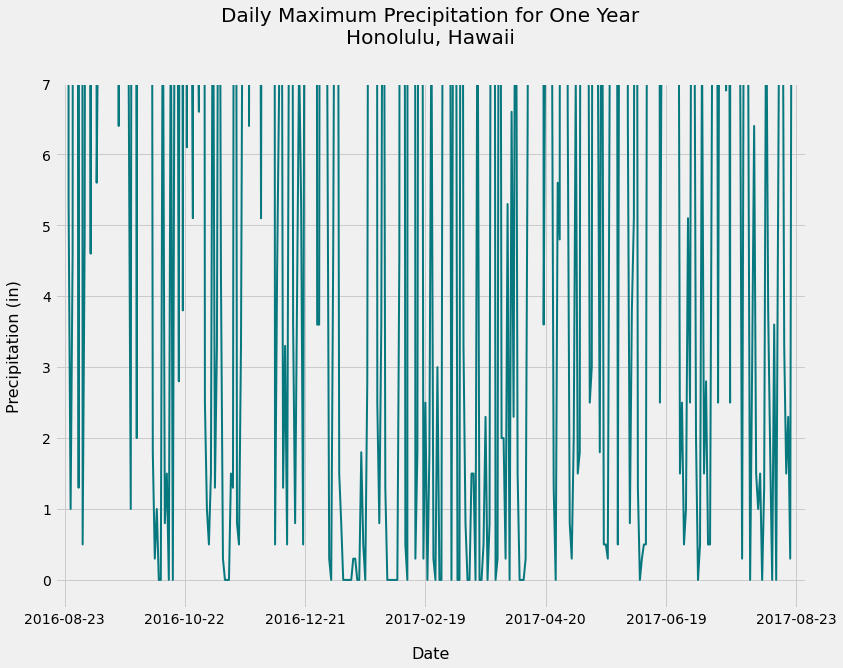

In [22]:
plt.rcParams['figure.figsize']=(12,9)
prcp_df.plot(linewidth=2,alpha=1,rot=0,
             xticks=(0,60,120,180,240,300,365),
             color='xkcd:deep aqua')


plt.xlim(-5,370)
plt.ylim(-0.4,7)
plt.yticks(size=14)
plt.xticks(fontsize=14)
plt.legend('',frameon=False)
plt.xlabel('Date',fontsize=16,color='black',labelpad=20)
plt.ylabel('Precipitation (in)',fontsize=16,color='black',labelpad=20)
plt.title('Daily Maximum Precipitation for One Year\nHonolulu, Hawaii',fontsize=20,pad=40)

plt.show()


In [23]:

year_prcp_stats=(Session.query(Measurement.date, Measurement.prcp)
                        .filter(Measurement.date > year_ago_date)
                        .all())

year_prcp_stats

year_prcp_stats_df=pd.DataFrame(year_prcp_stats, columns=['date', 'prcp'])
year_prcp_stats_df
year_prcp_stats_df.dropna()

,date,prcp
0,2016-08-23,0.0
1,2016-08-24,2.0
2,2016-08-25,2.0
3,2016-08-26,0.0
4,2016-08-27,0.0
...,...,...
2223,2017-08-17,3.3
2225,2017-08-19,2.3
2227,2017-08-21,14.2
2228,2017-08-22,12.7


In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data

year_prcp_stats_df.describe()


,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [25]:
total_stations=Session.query(Station).count()
print(f'There are {total_stations} stations at Honolulu, Hawaii.')

There are 9 stations at Honolulu, Hawaii.


In [26]:
# Design a query to calculate the total number stations in the dataset

total_stations=Session.query(func.count(Station.station)).all()
print(f'There are {total_stations} stations at Honolulu, Hawaii.')


There are [(9,)] stations at Honolulu, Hawaii.


In [27]:


# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.





active_station_results = Session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()

active_station_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


most_active_station_result= active_station_results[0][0]
Session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs).\
                filter(Measurement.station == most_active_station_result)).all()

[(11.7, 22.8321176470585, 29.4)]

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


year_tobs=(Session.query(Measurement.date,(Measurement.tobs))
                  .filter(func.strftime(Measurement.date) > year_ago_date)
                  .filter(Measurement.station=='USC00519281')
                  .all())
year_tobs

[('2016-08-23', 25.0),
 ('2016-08-24', 25.0),
 ('2016-08-25', 26.7),
 ('2016-08-26', 26.7),
 ('2016-08-27', 23.9),
 ('2016-08-28', 22.8),
 ('2016-08-29', 25.6),
 ('2016-08-30', 25.0),
 ('2016-08-31', 25.6),
 ('2016-09-01', 26.7),
 ('2016-09-02', 26.7),
 ('2016-09-03', 25.6),
 ('2016-09-04', 25.6),
 ('2016-09-05', 25.6),
 ('2016-09-06', 22.8),
 ('2016-09-07', 23.3),
 ('2016-09-08', 26.7),
 ('2016-09-09', 26.1),
 ('2016-09-10', 25.0),
 ('2016-09-11', 26.7),
 ('2016-09-12', 24.4),
 ('2016-09-13', 26.1),
 ('2016-09-14', 23.9),
 ('2016-09-15', 26.1),
 ('2016-09-16', 25.6),
 ('2016-09-17', 26.1),
 ('2016-09-18', 25.6),
 ('2016-09-19', 25.6),
 ('2016-09-20', 24.4),
 ('2016-09-21', 23.3),
 ('2016-09-22', 25.0),
 ('2016-09-23', 25.6),
 ('2016-09-24', 26.1),
 ('2016-09-25', 26.1),
 ('2016-09-26', 25.0),
 ('2016-09-27', 26.7),
 ('2016-09-28', 25.6),
 ('2016-09-29', 25.6),
 ('2016-09-30', 25.6),
 ('2016-10-01', 25.0),
 ('2016-10-02', 26.1),
 ('2016-10-03', 26.1),
 ('2016-10-04', 26.1),
 ('2016-10-

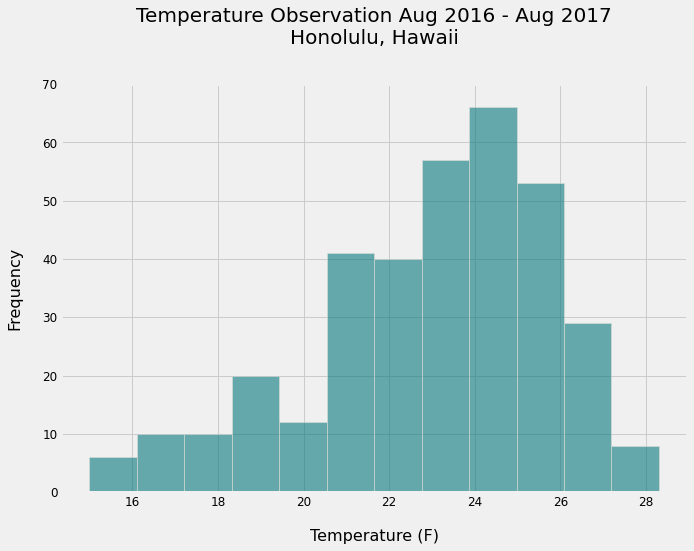

In [30]:
tobs_df=pd.DataFrame(year_tobs)
tobs_df.set_index('date',inplace=True)

plt.rcParams['figure.figsize']=(10,7)
plt.hist(tobs_df['tobs'],bins=12,alpha=0.6,edgecolor='xkcd:light gray',
         linewidth=1,color='xkcd:deep aqua')

plt.title('Temperature Observation Aug 2016 - Aug 2017\nHonolulu, Hawaii',fontsize=20,pad=40)
plt.xlabel('Temperature (F)',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency',fontsize=16,color='black',labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

plt.show()

# Close session

In [32]:
# Close Session
Session.close()